# Task 6.1: Time Series Analysis and Forecasting
Analyze historical sales data to uncover trends and forecast future sales using **Auto Regressive Integrated Moving Average (ARIMA)**.

## Step 1: Load and Visualize Data

                Sales
Date                 
2021-10-01  29.109547
2021-10-02  30.720435
2021-10-03  30.305173
2021-10-04  27.390893
2021-10-05  22.841123
Sales    0
dtype: int64


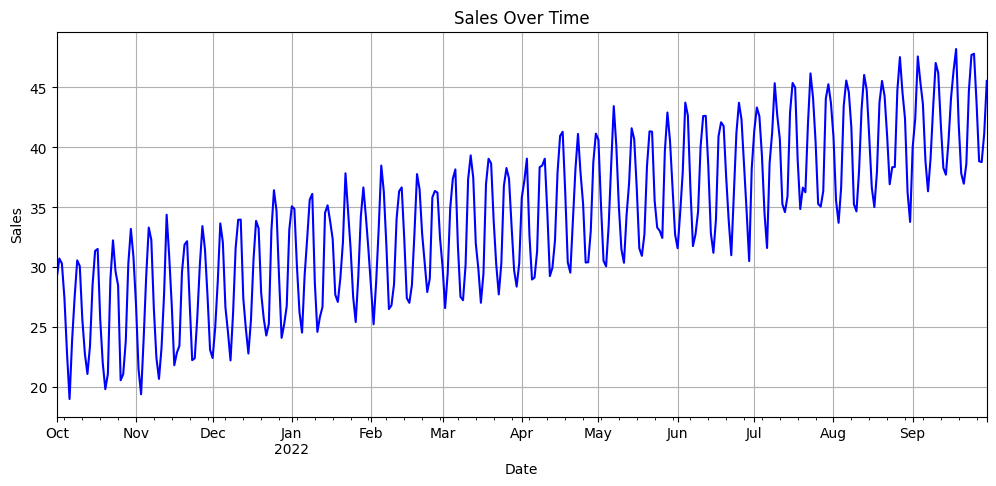

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("sales_timeseries.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D') 

# Inspect data
print(df.head())
print(df.isnull().sum())

# Plot sales trend
plt.figure(figsize=(12, 5))
df['Sales'].plot(title='Sales Over Time', color='blue')
plt.ylabel("Sales")
plt.grid(True)
plt.show()


## Step 2: Visual Trend Analysis
- Moving average smoothing


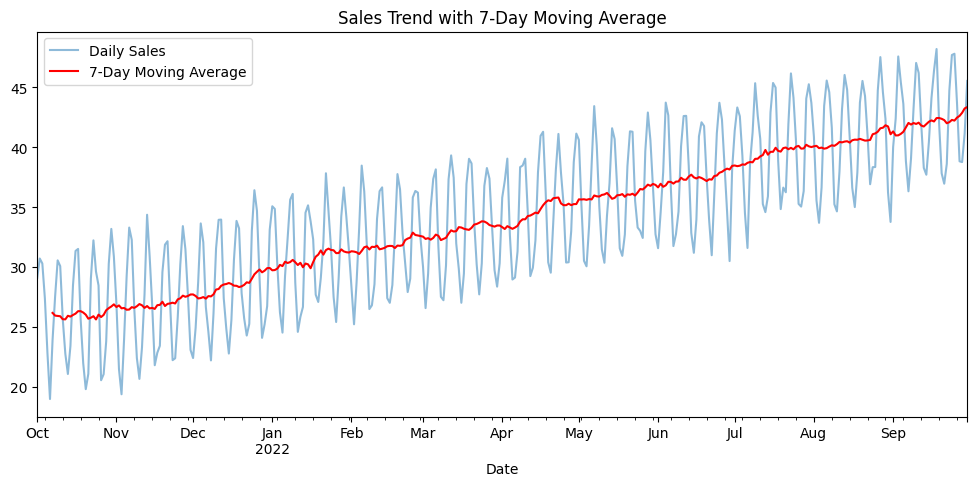

In [23]:
df['Sales_MA7'] = df['Sales'].rolling(window=7).mean()

plt.figure(figsize=(12, 5))
df['Sales'].plot(label='Daily Sales', alpha=0.5)
df['Sales_MA7'].plot(label='7-Day Moving Average', color='red')
plt.legend()
plt.title("Sales Trend with 7-Day Moving Average")
plt.show()


## Step 3: Train ARIMA Model

In [24]:
import pmdarima as pm
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Train-test split (last 30 days as test)
train = df['Sales'][:-30]
test = df['Sales'][-30:]

# Automatically select best (p,d,q) using auto_arima
model = pm.auto_arima(train,
                      seasonal=False,
                      stepwise=True,
                      trace=True,
                      suppress_warnings=True,
                      error_action='ignore')

print("✅ Best ARIMA order selected:", model.order)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1179.428, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1835.205, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1759.181, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1741.871, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1833.210, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1702.292, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1094.503, Time=1.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1051.777, Time=1.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1080.105, Time=1.21 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1037.211, Time=1.56 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1054.143, Time=1.34 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=1032.510, Time=1.78 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

## Step 4: Forecasting and Evaluation

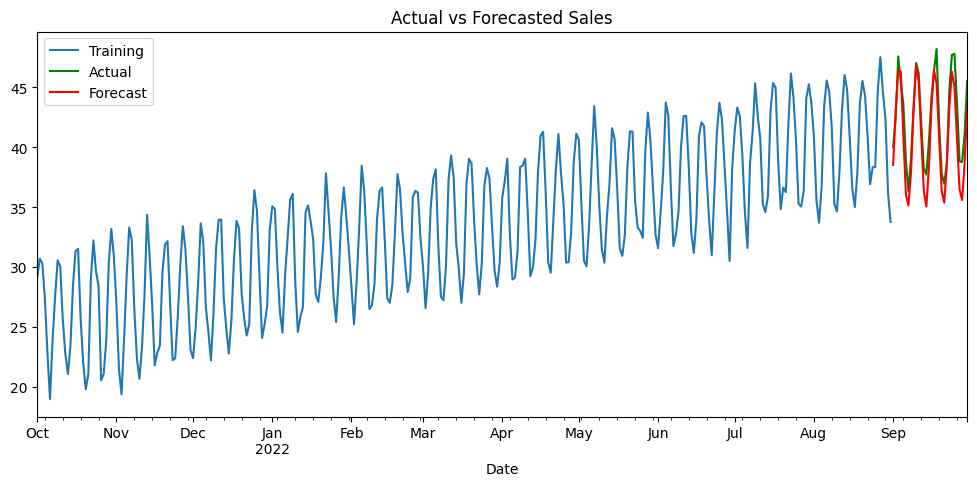

RMSE: 1.83
MAPE: 3.78%


In [26]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast.index = test.index

# Plot forecast vs actual
plt.figure(figsize=(12, 5))
train.plot(label='Training')
test.plot(label='Actual', color='green')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.title("Actual vs Forecasted Sales")
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


## Final Insights

- **RMSE (Root Mean Squared Error)**: 1.83  
  This means the predicted sales values deviate from the actual values by an average of ~1.83 units.
  
- **MAPE (Mean Absolute Percentage Error)**: 3.78%  
  The model predicts sales with an average error of just 3.78% — which is considered **very good** for time series forecasting.